## Clean version of post_pro_landau_rel for D=2

We use it and then move the results to Notes_log.

In [1]:
#using DifferentialEquations
using Plots
using Statistics
using FFTW
FFTW.set_provider!("mkl")
#import Pkg; Pkg.add("FileIO")
using FileIO
using JLD2
using Base.Threads
using Distributions
using LaTeXStrings
using Printf
using LsqFit
using LinearAlgebra

In [2]:
include("aux_functions/aux_functions.jl")

plot_matrix

In [3]:
outputs = false # detailed output (no longer used)
average_outputs =false
full_outputs = true
animation = false # to run animations
phase_space_show = false #show phase space diagrams
phase_space_show = true
remote_server = false # if run in remote as a script avoid all plots 
save_plots = true # put true is you want so save your plots.
plots = true

true

We first introduce the name of the file with the data and retrieve the metadata.

In [4]:
#file_name = "Results/norel_norm_undamped_rel_t400_L4_N85_n2_J80_M16001_o5_Th3_alp2_ave.jld2"
#file_name = "Results/norel_norm_undamped_rel_t400_L4_N86_n2_J80_M16001_o5_Th3_alp2_ave.jld2"
#file_name = "Results/norel_norm_undamped_rel_t400_L39.738_N86_n2_J3522_M16001_o5_Th3_alp2_ave.jld2"
#file_name = "Results/norel_norm_damped_rel_t40_L7.455_N85_n15_J930_M16001_o4_Th3_alp2_ave.jld2"
#file_name = "Results/weibel_Box_1.0x1.0_J_50x100_Ax_25_Th3_alp8tf_1_N7_M11_o5_B0_0_full.jld2"
#file_name = "Results/thermal_rel_Box_1.0x1.0_J_100x100_nm_[1,1]__Th3_alp1tf_100_N5_M1001_o5_B0_0_full.jld2"
file_name = "Results/thermal_rel_Box_1.0x1.0_J_100x100_nm_[1,1]__Th3_alp1tf_100_N5_M1001_o5_B0_0_full.jld2"

"Results/thermal_rel_Box_1.0x1.0_J_100x100_nm_[1,1]__Th3_alp1tf_100_N5_M1001_o5_B0_0_full.jld2"

In [6]:

data, run_name, par_grid, par_evolv, par_f, n0, xs, t_series = retrieve_meta_data_D(file_name)
@show run_name
@show par_grid
@show par_evolv
@show par_f
@show (N, J, Box_x, order) = par_grid
@show (t_i, t_f, M, M_g, dt) = par_evolv
#@show (θ, nm, k) = par_f

dT = dt*(M-1)/(M_g-1)


#freqs_space = L*rfftfreq(J, 1/dx)

M_last = M_g  # number of last data point saved. Otherwise use M_g
#freqs_time = fftshift(rfftfreq(M_last, 1/dT))
#freqs_time = rfftfreq(M_last, 1/dT)*2*π;

dx = differentials(Box_x,J)
x_p = [dx[1]*(i-1) for i in 1:J[1]] ;
y_p = [dx[2]*(i-1) for i in 1:J[2]] ;

run_name = "thermal_rel_Box_1.0x1.0_J_100x100_nm_[1,1]__Th3_alp1tf_100_N5_M1001_o5_B0_0"
par_grid = (100000, (100, 100), (0.0, 1.0, 0.0, 1.0), 5)
par_evolv = (0.0, 10.0, 1001, 11, 0.01)
par_f = (0.001, 0.025, 25)
(N, J, Box_x, order) = par_grid = (100000, (100, 100), (0.0, 1.0, 0.0, 1.0), 5)
(t_i, t_f, M, M_g, dt) = par_evolv = (0.0, 10.0, 1001, 11, 0.01)


In [6]:
if false
f_test(t) = sin(2*π*5*t)
F_test = rfft(f_test.(t_series))
freqs_time_test = (rfftfreq(M_g, 1/dT));
Plots.scatter(freqs_time_test, (abs.(F_test)))
end

We can have data written out in full o in averaged format: In each case we use different functions. Data written in full has a `"full.jld2"` at the end, otherwise a `"ave.jld2"` is used.

For the full case we use:

```
v = retrieve_data_D(data, par_grid, par_evolv);
```
```
Energy_K, Energy_E, EField_T, p_T, Q_T, S_T, T = get_averages_threads_D(v,par_grid,par_evolv, par_f);
```

For the averaged case we use:

```
M_last = 1601 # number of iterations already completed. 

n_t, S_t, Efield_t, averages = retrieve_average_data_D(data, par_grid, par_evolv;M_last=M_last);

Energy_E,  Energy_K, EField_T, p_T, Q_T, S_T, T = averages;
```



In [8]:
M_last = 3
if average_outputs
n_t, S_t, Efield_t, averages = retrieve_average_data_D(data, par_grid, par_evolv;M_last=M_last);

Energy_E,  Energy_K, EField_T, p_T, Q_T, S_T, T = averages;

elseif full_outputs
    v = retrieve_data_D(data, par_grid, par_evolv; M_last=M_last);
end

430000×11 Matrix{Float64}:
  0.0911425    0.115169     0.139195    …  0.0  0.0  0.0  0.0  0.0  0.0  0.0
  0.351403     0.368505     0.385606       0.0  0.0  0.0  0.0  0.0  0.0  0.0
  0.0240366    0.0240367    0.024037       0.0  0.0  0.0  0.0  0.0  0.0  0.0
  0.017109     0.0171092    0.0171091      0.0  0.0  0.0  0.0  0.0  0.0  0.0
  0.958884     0.955886     0.952886       0.0  0.0  0.0  0.0  0.0  0.0  0.0
  0.689304     0.714479     0.739654    …  0.0  0.0  0.0  0.0  0.0  0.0  0.0
 -0.00299938  -0.00300006  -0.00300087     0.0  0.0  0.0  0.0  0.0  0.0  0.0
  0.0251839    0.0251834    0.0251829      0.0  0.0  0.0  0.0  0.0  0.0  0.0
  0.099493     0.108794     0.118097       0.0  0.0  0.0  0.0  0.0  0.0  0.0
  0.0552787    0.042154     0.0290302      0.0  0.0  0.0  0.0  0.0  0.0  0.0
  ⋮                                     ⋱       ⋮                        ⋮
  4.77675e-7   2.56071e-7   1.51429e-8     0.0  0.0  0.0  0.0  0.0  0.0  0.0
 -1.01811e-7   2.13741e-7   2.83458e-8     0.0  0.0

Check constraints:

In [9]:
j = 3
par_grid = (N, Box_x, J, 5)
nf = zeros(J)
get_density_2D!(v[1:4N,j], nf, par_grid)

Ef = Array{Float64,3}(undef,(2,J...))
ρf = nf.-1.0/prod(J)
@show sum(ρf)
get_E!(Ef,ρf,Box_x);

sum(ρf) = 2.2985086056692694e-17


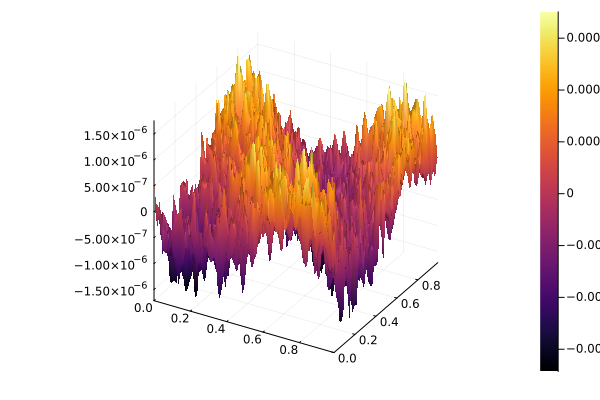

In [10]:

Fuj = view(v[:,j],4N+1:4N+3*prod(J))

Fj = reshape(Fuj,3,J...)

#F = view(u[4N+1:end],3,J...)
Ej = Fj[1:2,:,:]
Bj = Fj[3,:,:];

surface(y_p,x_p,Ej[2,:,:])
#surface(y_p,x_p,Bj[:,:])

#norm(Bj)

In [11]:
norm(Ef - Ej)/norm(Ej)

0.5966696541529544

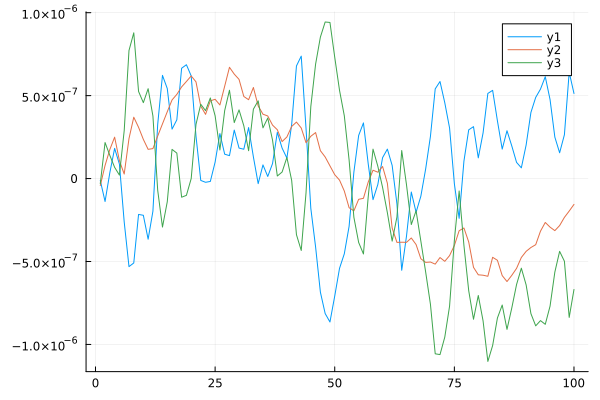

In [13]:
plot(Ef[1,:,50] - Ej[1,:,50])
plot!(Ef[1,:,50])
plot!(Ej[1,:,50])

In [ ]:

plot_averages(averages, t_series[1:M_last], N, run_name, save_plots)

In [ ]:
C_i = 0.060145630933730654 + 0.31190415932386045im

Plots.scatter(t_series[1:M_last],E_mode[1:M_last], markersize=1)
@. model_mode(x,p) = abs(real((p[1]+im*p[2])*exp(im*(p[3]+im*p[4])*x)))
N_i = 10
N_f = M_last
pm = [real.(C_i); imag.(C_i);1.1; 0.10]
#model_mode(2,pm)
fit_E_mode = curve_fit(model_mode, t_series[N_i:N_f], E_mode[N_i:N_f], pm);
plot!(t_series[N_i:N_f], model_mode(t_series[N_i:N_f],fit_E_mode.param))
#fit_E_mode.param
if save_plots
    png("Images/" * run_name * "_single_mode_fit.png")
end

In [ ]:
fit_E_mode.param

#### Energy fit 

In [ ]:
plot_energies(Energy_K, Energy_E, t_series[1:M_last], run_name, save_plots)

In [ ]:
@. model_e1(x,p) =  p[1] + p[2]*cos(p[3]*x + p[4])*exp(-p[5]*x) + p[6]*cos(p[7]*x + p[8])*exp(-p[9]*x)
@. model_e2(x,p) = p[1] + p[2]*(cos(p[3]*x + p[4])^2 - p[6])*exp(-p[5]*x)
@. model_e3(x,p) = p[1] + (p[2]*cos(p[3]*x + p[4])*exp(-p[5]*x) + p[6]*cos(p[7]*x + p[8])*exp(-p[9]*x))^2

pe_1 = [0.00001; 0.0001; 2; 0; 0.002; 0.00001; 2; 0; 0.0]
pe_2 = [0.0001; -0.0001; 1; 0; 0.000; 0.5]

#pe = [0.001; 0.001; 2.03; 2; 0.002; 0.001; 3.0; 0.0; 0.0]
#pe = [0.01; -0.01; 1; 0; 0.002; 0.0]
pe_3 = [0.00001; 0.001; 1.0; 2; 0.000; 0.001; 1.002; 0.0; 0.000]
#pe_3 = fit_e.param
fit_e, plt = energy_fit(t_series, Energy_E, model_e2, pe_2, 10, M_last, run_name, save_plots, yscale=:identity)
plt 

In [ ]:
fit_e.param

#### Temperature Fit

In [ ]:
N_i = 1
N_f = M_last
p_tl001 = [0.001; 0.001; 2.02; 0; 0.0; 0.; 2.0; 0; 0]
fit_T_1, plt = temperature_fit(t_series, T, p_tl001, N_i, N_f, run_name, save_plots)
plt

In [ ]:
#model_tl001(x,p) = p[1] + p[2]*cos(p[3]*x + p[4])*exp(-p[5]*x) + p[6]*cos(p[7]*x + p[8])*exp(-p[9]*x)
fit_T_1.param

In [ ]:
ΔT = T .- sum(T)/length(T)
T_F = rfft(ΔT)
Plots.scatter(freqs_time,abs.((T_F)), title = " Temperature Spectrum", label="abs.(T_F)",legend=:topleft
, xticks=1.9:0.05:2.3, xlim=(1.9,2.3)
)
#=
Plots.scatter(abs.((T_F)), title = "Spectrum", label="abs.(T_F)",legend=:topleft
    , xticks=100:1:200, xlim=(120,140)
    )
    =#

    if save_plots
        png("Images/" * run_name * "_temperature_spectrum.png")
    end

In [ ]:
plot(ΔT)

In [ ]:
N_i = 1
N_f = M_last
p_tl001 = [0.00; 0.001; 2.02; 0; 0.0; 0.; 2.0; 0; 0]
fit_ΔT_1, plt = temperature_fit(t_series, T, p_tl001, N_i, N_f, run_name, save_plots)
plt

In [ ]:
fit_ΔT_1.param

#### Density study

In [ ]:
plot(n_t[:,M_last])

In [ ]:
n_F = rfft(n_t[:,M_last].-1); # we take out the background
#n_F = rfft(n_t[:,1].-1); # we take out the background

In [ ]:
Plots.scatter(freqs_space,abs.((n_F)), title = "Density Spectrum", label="abs.(n_F)",legend=:topleft
    , xticks=0:0.2:6
    , xlim=(0,6)
    )
    #recall that it is shifted one position to the right, so the frequency is 20.

In [ ]:
3/2*0.1^2

In [ ]:
2.012904971545909/2

In [ ]:
2.0033087748744984/2

